<a href="https://colab.research.google.com/github/evillag/xtol_m5/blob/master/T2/EDA_M5T2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 2: Prepare and Explore the Data**
## **Data Science with Python (XTOL - Cenfotec)**
## *Author: Esteban  Villalobos*
## *March 5$^{th}$, 2020*


## Dataset description:
The dataset loaded contains labeled records of Taiwan customers' payment habits over a period of 6 months.

**Source**: *Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.*

### **Attribute Information**
This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:

- LIMIT_BAL: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
- SEX:
 - 1 = male
 - 2 = female

- EDUCATION: 
 - 1 = graduate school
 - 2 = university
 - 3 = high school
 - 0, 4, 5, 6 = others
- MARRIAGE: 
 - 1 = married
 - 2 = single
 - 3 = divorce
 - 0 =others
- AGE: Age (year).
- PAY_0-PAY_6: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: 
>
 - PAY_0 = the repayment status in September, 2005
 - PAY_2 = the repayment status in August, 2005
 - . . .
 - PAY_6 = the repayment status in April, 2005.
 
> The measurement scale for the repayment status is:
- -2: No consumption
- -1: Paid in full
- 0: The use of revolving credit
- 1 = payment delay for one month
- 2 = payment delay for two months
- . . .
- 8 = payment delay for eight months
- 9 = payment delay for nine months and above
 
- BILL_AMT1-BILL_AMT6: Amount of bill statement (NT dollar):
 - BILL_AMT1 = amount of bill statement in September, 2005
 - BILL_AMT2 = amount of bill statement in August, 2005
 - . . .
 - BILL_AMT6 = amount of bill statement in April, 2005

- PAY_AMT1-PAY_AMT6: Amount of previous payment (NT dollar):
 - PAY_AMT1 = amount paid in September, 2005
 - PAY_AMT2 = amount paid in August, 2005
 - . . .
 - PAY_AMT6 = amount paid in April, 2005

- DEAFULT = *default payment next month*: client's behavior:
 - 0 = then not default
 - 1 = then default

# Import Libraries

In [0]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
plt.rcParams['figure.figsize'] = [10.0, 8.0]

# Reading Data Set using Pandas

In [23]:
credit = pd.read_csv('https://raw.githubusercontent.com/evillag/xtol_m5/master/T2/default%20of%20credit%20card%20clients.csv',
                     header =1, index_col=0)
credit = credit.rename(columns={
    'default payment next month': 'DEFAULT',
    'PAY_0': 'PAY_STATUS_SEP',
    'PAY_2': 'PAY_STATUS_AUG',
    'PAY_3': 'PAY_STATUS_JUL',
    'PAY_4': 'PAY_STATUS_JUN',
    'PAY_5': 'PAY_STATUS_MAY',
    'PAY_6': 'PAY_STATUS_APR',
    'BILL_AMT1': 'BILL_SEP',
    'BILL_AMT2': 'BILL_AUG',
    'BILL_AMT3': 'BILL_JUL',
    'BILL_AMT4': 'BILL_JUN',
    'BILL_AMT5': 'BILL_MAY',
    'BILL_AMT6': 'BILL_APR',
    'PAY_AMT1': 'PAID_SEP',
    'PAY_AMT2': 'PAID_AUG',
    'PAY_AMT3': 'PAID_JUL',
    'PAY_AMT4': 'PAID_JUN',
    'PAY_AMT5': 'PAID_MAY',
    'PAY_AMT6': 'PAID_APR',
})
credit.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_STATUS_SEP,PAY_STATUS_AUG,PAY_STATUS_JUL,PAY_STATUS_JUN,PAY_STATUS_MAY,PAY_STATUS_APR,BILL_SEP,BILL_AUG,BILL_JUL,BILL_JUN,BILL_MAY,BILL_APR,PAID_SEP,PAID_AUG,PAID_JUL,PAID_JUN,PAID_MAY,PAID_APR,DEFAULT
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Analysis

In [24]:
credit.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
LIMIT_BAL         30000 non-null int64
SEX               30000 non-null int64
EDUCATION         30000 non-null int64
MARRIAGE          30000 non-null int64
AGE               30000 non-null int64
PAY_STATUS_SEP    30000 non-null int64
PAY_STATUS_AUG    30000 non-null int64
PAY_STATUS_JUL    30000 non-null int64
PAY_STATUS_JUN    30000 non-null int64
PAY_STATUS_MAY    30000 non-null int64
PAY_STATUS_APR    30000 non-null int64
BILL_SEP          30000 non-null int64
BILL_AUG          30000 non-null int64
BILL_JUL          30000 non-null int64
BILL_JUN          30000 non-null int64
BILL_MAY          30000 non-null int64
BILL_APR          30000 non-null int64
PAID_SEP          30000 non-null int64
PAID_AUG          30000 non-null int64
PAID_JUL          30000 non-null int64
PAID_JUN          30000 non-null int64
PAID_MAY          30000 non-null int64
PAID_APR          30000 non-null 

In [25]:
# Check if there are null values in the dataset.
credit.isna().describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_STATUS_SEP,PAY_STATUS_AUG,PAY_STATUS_JUL,PAY_STATUS_JUN,PAY_STATUS_MAY,PAY_STATUS_APR,BILL_SEP,BILL_AUG,BILL_JUL,BILL_JUN,BILL_MAY,BILL_APR,PAID_SEP,PAID_AUG,PAID_JUL,PAID_JUN,PAID_MAY,PAID_APR,DEFAULT
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000


## Fix column types

In [26]:
credit['SEX'].replace([1,2],['male','female'], inplace=True)
credit['EDUCATION'].replace([0,1,2,3,4,5,6],['other','grad_school','university',
                                             'high_school', 'other',
                                             'other','other'], inplace=True)
credit['MARRIAGE'].replace([0,1,2,3],['other', 'married', 'single', 
                                      'divorce'], inplace=True)

def set_payment_status(df, col):
  df[col].replace([-2,-1,0,1,2,3,4,5,6,7,8,9],
                  ['no_consumption','paid_in_full','use_revolving_credit',
                   'delay_1m','delay_2m','delay_3m','delay_4m','delay_5m',
                   'delay_6m','delay_7m','delay_8m','delay_9m'], inplace=True)

set_payment_status(credit, 'PAY_STATUS_SEP')
set_payment_status(credit, 'PAY_STATUS_AUG')
set_payment_status(credit, 'PAY_STATUS_JUL')
set_payment_status(credit, 'PAY_STATUS_JUN')
set_payment_status(credit, 'PAY_STATUS_MAY')
set_payment_status(credit, 'PAY_STATUS_APR')

credit['DEFAULT'].replace([0,1],['False','True'], inplace=True)

for col in ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_STATUS_SEP','PAY_STATUS_AUG',
            'PAY_STATUS_JUL','PAY_STATUS_JUN','PAY_STATUS_MAY',
            'PAY_STATUS_APR', 'DEFAULT']:            
            credit[col] = credit[col].astype('category')

credit.sample(25)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_STATUS_SEP,PAY_STATUS_AUG,PAY_STATUS_JUL,PAY_STATUS_JUN,PAY_STATUS_MAY,PAY_STATUS_APR,BILL_SEP,BILL_AUG,BILL_JUL,BILL_JUN,BILL_MAY,BILL_APR,PAID_SEP,PAID_AUG,PAID_JUL,PAID_JUN,PAID_MAY,PAID_APR,DEFAULT
ID,,,,,,,,,,,,,,,,,,,,,,,,
3608,200000,male,grad_school,married,59,use_revolving_credit,use_revolving_credit,use_revolving_credit,delay_2m,delay_2m,delay_2m,27119,28081,30299,29516,31378,31914,1700,3000,0,2500,1200,0,False
9373,80000,female,grad_school,married,43,paid_in_full,paid_in_full,paid_in_full,no_consumption,no_consumption,paid_in_full,21057,2282,-185,-185,-185,665,2282,0,0,0,1000,0,False
20398,480000,male,grad_school,married,37,paid_in_full,paid_in_full,paid_in_full,paid_in_full,use_revolving_credit,use_revolving_credit,2849,30999,53425,76538,106032,66535,45205,55328,77000,30048,30015,15056,False
1609,390000,female,university,single,42,paid_in_full,paid_in_full,use_revolving_credit,use_revolving_credit,use_revolving_credit,use_revolving_credit,5895,42006,31192,13859,10078,4635,42016,1397,347,250,145,94,False
28795,160000,female,university,married,31,paid_in_full,paid_in_full,use_revolving_credit,use_revolving_credit,no_consumption,no_consumption,1133,31964,24805,0,0,0,31964,1003,0,0,0,0,False
14943,240000,female,grad_school,single,26,delay_1m,paid_in_full,paid_in_full,paid_in_full,paid_in_full,paid_in_full,0,189,651,0,127,0,189,651,0,127,0,0,False
22570,180000,male,grad_school,single,31,use_revolving_credit,use_revolving_credit,use_revolving_credit,use_revolving_credit,use_revolving_credit,use_revolving_credit,89903,66236,59932,52382,40661,32385,3073,3010,2010,1200,1000,1000,False
28377,50000,female,university,married,36,delay_2m,delay_2m,delay_2m,delay_2m,use_revolving_credit,use_revolving_credit,46203,45159,49125,47956,43578,35126,0,4700,0,2004,3500,0,False
8309,80000,male,grad_school,single,25,no_consumption,no_consumption,no_consumption,no_consumption,no_consumption,no_consumption,0,0,0,0,0,0,0,0,0,0,0,0,False


In [27]:
# Check fixed column types
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
LIMIT_BAL         30000 non-null int64
SEX               30000 non-null category
EDUCATION         30000 non-null category
MARRIAGE          30000 non-null category
AGE               30000 non-null int64
PAY_STATUS_SEP    30000 non-null category
PAY_STATUS_AUG    30000 non-null category
PAY_STATUS_JUL    30000 non-null category
PAY_STATUS_JUN    30000 non-null category
PAY_STATUS_MAY    30000 non-null category
PAY_STATUS_APR    30000 non-null category
BILL_SEP          30000 non-null int64
BILL_AUG          30000 non-null int64
BILL_JUL          30000 non-null int64
BILL_JUN          30000 non-null int64
BILL_MAY          30000 non-null int64
BILL_APR          30000 non-null int64
PAID_SEP          30000 non-null int64
PAID_AUG          30000 non-null int64
PAID_JUL          30000 non-null int64
PAID_JUN          30000 non-null int64
PAID_MAY          30000 non-null int64
PAID_A

## Review descriptive statistics

In [28]:
credit.describe()

,LIMIT_BAL,AGE,BILL_SEP,BILL_AUG,BILL_JUL,BILL_JUN,BILL_MAY,BILL_APR,PAID_SEP,PAID_AUG,PAID_JUL,PAID_JUN,PAID_MAY,PAID_APR
count,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,9.217904,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,34.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [29]:
credit.describe(include='category')

,SEX,EDUCATION,MARRIAGE,PAY_STATUS_SEP,PAY_STATUS_AUG,PAY_STATUS_JUL,PAY_STATUS_JUN,PAY_STATUS_MAY,PAY_STATUS_APR,DEFAULT
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,2,4,4,11,11,11,11,10,10,2
top,female,university,single,use_revolving_credit,use_revolving_credit,use_revolving_credit,use_revolving_credit,use_revolving_credit,use_revolving_credit,False
freq,18112,14030,15964,14737,15730,15764,16455,16947,16286,23364


# Exploratory Data Analysis

## Distribution of Loans limit balance

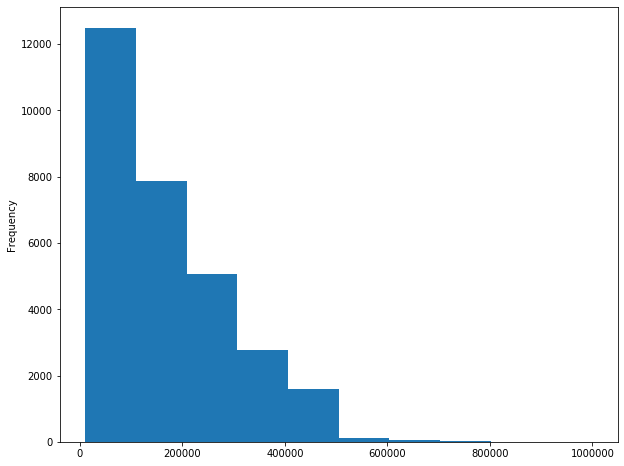

In [30]:
credit['LIMIT_BAL'].plot(kind='hist')

Distribution of data by quantiles:

In [31]:
credit['LIMIT_BAL_QUANTILE'], bins = pd.qcut(credit['LIMIT_BAL'], q=4, 
                                             retbins=True,
                                             precision=0)
print(f"Limit Balance discretization:\n{credit['LIMIT_BAL_QUANTILE'].value_counts()}")
credit['AGE_QUANTILE'] = pd.qcut(credit['AGE'], q=4, precision=0)
print(f"Agediscretization:\n{credit['AGE_QUANTILE'].value_counts()}")
credit[['AGE','AGE_QUANTILE', 'LIMIT_BAL', 'LIMIT_BAL_QUANTILE']].sample(15)

Limit Balance discretization:
(9999.0, 50000.0]        7676
(140000.0, 240000.0]     7643
(50000.0, 140000.0]      7614
(240000.0, 1000000.0]    7067
Name: LIMIT_BAL_QUANTILE, dtype: int64
Agediscretization:
(20.0, 28.0]    8013
(28.0, 34.0]    7683
(41.0, 79.0]    7450
(34.0, 41.0]    6854
Name: AGE_QUANTILE, dtype: int64


,AGE,AGE_QUANTILE,LIMIT_BAL,LIMIT_BAL_QUANTILE
ID,,,,
22121,29,"(28.0, 34.0]",60000,"(50000.0, 140000.0]"
18906,29,"(28.0, 34.0]",280000,"(240000.0, 1000000.0]"
19098,25,"(20.0, 28.0]",50000,"(9999.0, 50000.0]"
22881,39,"(34.0, 41.0]",30000,"(9999.0, 50000.0]"
9968,24,"(20.0, 28.0]",30000,"(9999.0, 50000.0]"
7110,28,"(20.0, 28.0]",30000,"(9999.0, 50000.0]"
4583,22,"(20.0, 28.0]",30000,"(9999.0, 50000.0]"
13075,37,"(34.0, 41.0]",490000,"(240000.0, 1000000.0]"
6779,27,"(20.0, 28.0]",180000,"(140000.0, 240000.0]"


In [11]:
header = credit.dtypes.index
print(header)

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_STATUS_SEP',
       'PAY_STATUS_AUG', 'PAY_STATUS_JUL', 'PAY_STATUS_JUN', 'PAY_STATUS_MAY',
       'PAY_STATUS_APR', 'BILL_SEP', 'BILL_AUG', 'BILL_JUL', 'BILL_JUN',
       'BILL_MAY', 'BILL_APR', 'PAID_SEP', 'PAID_AUG', 'PAID_JUL', 'PAID_JUN',
       'PAID_MAY', 'PAID_APR', 'DEFAULT', 'LIMIT_BAL_QUANTILE',
       'AGE_QUANTILE'],
      dtype='object')


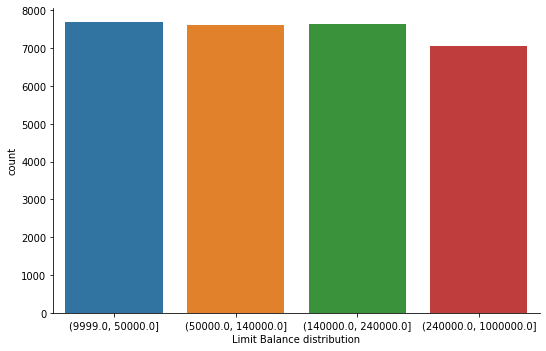

In [37]:
# Count obeservations per balance limit buckets
fg = sns.catplot('LIMIT_BAL_QUANTILE', data=credit, kind='count', aspect=1.5)
fg.set_xlabels('Limit Balance distribution')
plt.show()

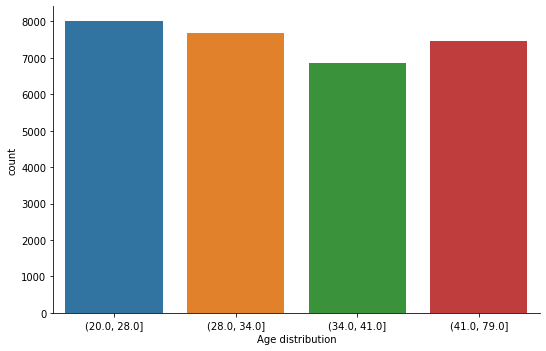

In [39]:
# Count obeservations per age buckets
fg = sns.catplot('AGE_QUANTILE', data=credit, kind='count', aspect=1.5)
fg.set_xlabels('Age distribution')
plt.show()

**Note** that the dataset is unblanaced towards womens, there are $38.8\%$ more observations from female customers than males.

### Hypothesis: *Do male customers default more than female ones?**

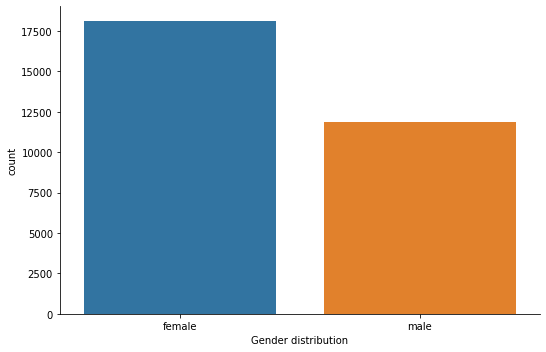

SEX
female    18112
male      11888
Name: SEX, dtype: int64

In [47]:
# Count obeservations per Gender
fg = sns.catplot('SEX', data=credit, kind='count', aspect=1.5)
fg.set_xlabels('Gender distribution')
plt.show()
credit.groupby('SEX')['SEX'].count()

SEX     DEFAULT
female  False      14349
        True        3763
male    False       9015
        True        2873
Name: SEX, dtype: int64

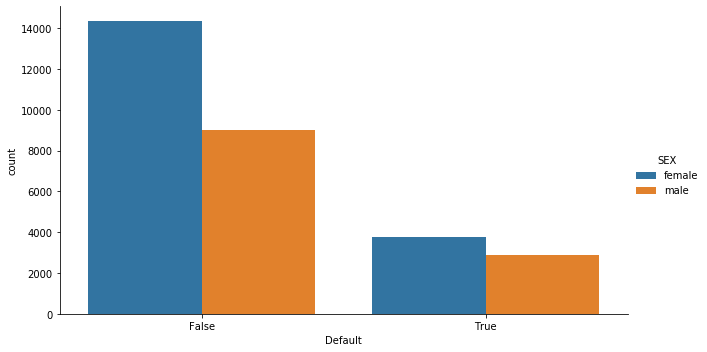

In [48]:
# Group by Gender and default status
g = sns.catplot('DEFAULT', data=credit, hue='SEX', kind='count', aspect=1.75)
g.set_xlabels('Default')
credit.groupby(['SEX', 'DEFAULT'])['SEX'].count()

Given that the dataset is unbalanced (there are more observations of female customers), we need to analyze this by percentages:


---


- Total Male observations: $11,888$

- Total Defaulted Male observations: $2,873$

- Total female observations: $18,112$

- Total Defaulted female observations: $3,763$

- Percentage of Defaulted Males: $0.24167$

- Percentage of Defaulted Females: $0.20777$


---

At plain sight, it seems there is some evidence pointing towards males being more prone to default than women, however, proper hypothesis testing is required.









---

Line Plots


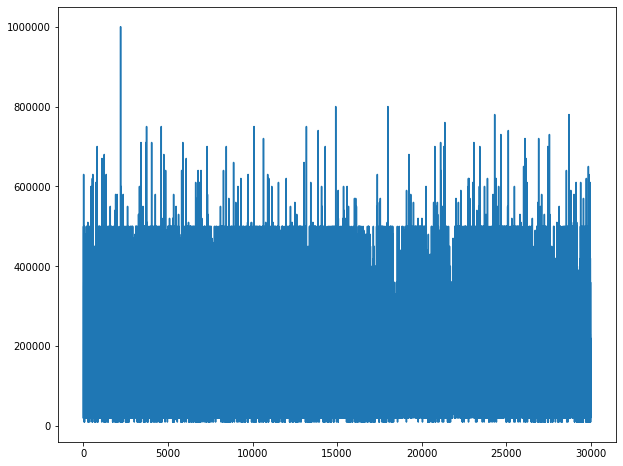

In [13]:
plt.plot(credit['LIMIT_BAL'])
plt.show()

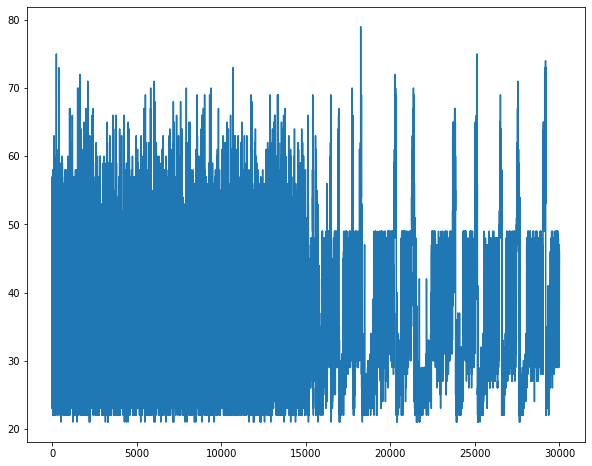

In [14]:
plt.plot(credit[['AGE']])
plt.show()

Scatter plots

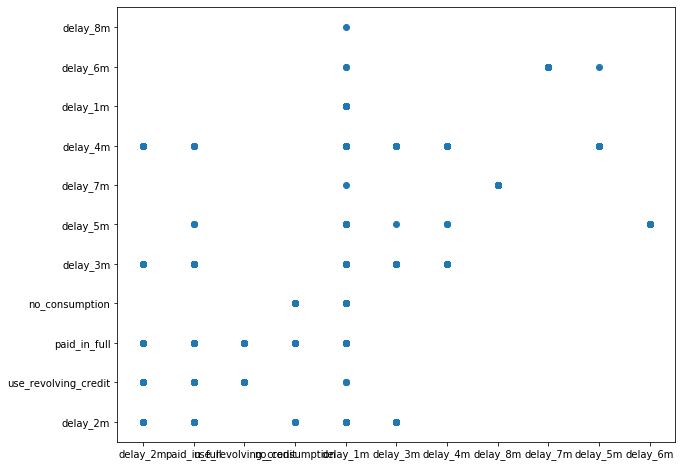

In [15]:
x = credit['PAY_STATUS_SEP']
y = credit['PAY_STATUS_AUG']
plt.scatter(x,y)
plt.show()

 Box Plots

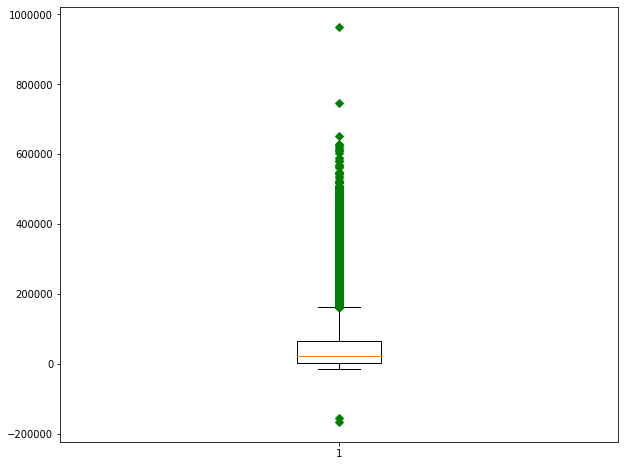

In [16]:
A = credit['BILL_SEP']
plt.boxplot(A,0,'gD')
plt.show()

Correlation matrix

In [17]:
corrMat = credit.corr()
print(corrMat)

           LIMIT_BAL       AGE  BILL_SEP  ...  PAID_JUN  PAID_MAY  PAID_APR
LIMIT_BAL   1.000000  0.144713  0.285430  ...  0.203242  0.217202  0.219595
AGE         0.144713  1.000000  0.056239  ...  0.021379  0.022850  0.019478
BILL_SEP    0.285430  0.056239  1.000000  ...  0.158303  0.167026  0.179341
BILL_AUG    0.278314  0.054283  0.951484  ...  0.147398  0.157957  0.174256
BILL_JUL    0.283236  0.053710  0.892279  ...  0.143405  0.179712  0.182326
BILL_JUN    0.293988  0.051353  0.860272  ...  0.130191  0.160433  0.177637
BILL_MAY    0.295562  0.049345  0.829779  ...  0.293118  0.141574  0.164184
BILL_APR    0.290389  0.047613  0.802650  ...  0.250237  0.307729  0.115494
PAID_SEP    0.195236  0.026147  0.140277  ...  0.199558  0.148459  0.185735
PAID_AUG    0.178408  0.021785  0.099355  ...  0.180107  0.180908  0.157634
PAID_JUL    0.210167  0.029247  0.156887  ...  0.216325  0.159214  0.162740
PAID_JUN    0.203242  0.021379  0.158303  ...  1.000000  0.151830  0.157834
PAID_MAY    

Covariance

In [18]:
covMat = credit.cov()
print(covMat)

              LIMIT_BAL            AGE  ...      PAID_MAY      PAID_APR
LIMIT_BAL  1.683446e+10  173076.722569  ...  4.305657e+08  5.065153e+08
AGE        1.730767e+05      84.969755  ...  3.218052e+03  3.191904e+03
BILL_SEP   2.727020e+09   38172.933546  ...  1.879091e+08  2.347681e+08
BILL_AUG   2.570130e+09   35613.657962  ...  1.717652e+08  2.204845e+08
BILL_JUL   2.548533e+09   34334.251320  ...  1.904126e+08  2.247817e+08
BILL_JUN   2.453926e+09   30453.108180  ...  1.576892e+08  2.031590e+08
BILL_MAY   2.331481e+09   27654.067800  ...  1.315051e+08  1.774537e+08
BILL_APR   2.243837e+09   26137.648547  ...  2.799982e+08  1.222761e+08
PAID_SEP   4.195711e+08    3992.041735  ...  3.756893e+07  5.469033e+07
PAID_AUG   5.333504e+08    4626.861549  ...  6.368414e+07  6.456816e+07
PAID_JUL   4.801180e+08    4746.824393  ...  4.282921e+07  5.093879e+07
PAID_JUN   4.131202e+08    3087.324192  ...  3.634098e+07  4.395747e+07
PAID_MAY   4.305657e+08    3218.052172  ...  2.334266e+08  4.207

# Normalize dataframe

Only columns with monetary amounts will be normalized.

In [19]:
normalizable_df = credit[['LIMIT_BAL','BILL_SEP','BILL_AUG','BILL_JUL',
                          'BILL_JUN','BILL_MAY','BILL_APR','PAID_SEP',
                          'PAID_AUG','PAID_JUL','PAID_JUN','PAID_MAY',
                          'PAID_APR',]]
cred_normalized=((normalizable_df-normalizable_df.min())/(normalizable_df.max()-normalizable_df.min()))*20

cred_normalized.sample(15)

,LIMIT_BAL,BILL_SEP,BILL_AUG,BILL_JUL,BILL_JUN,BILL_MAY,BILL_APR,PAID_SEP,PAID_AUG,PAID_JUL,PAID_JUN,PAID_MAY,PAID_APR
ID,,,,,,,,,,,,,
11099,3.232323,3.760387,2.193891,2.216330,4.016839,2.433860,5.802975,0.062549,0.030613,0.051337,0.064412,0.056268,0.000000
3383,3.232323,3.646096,2.101417,2.101229,3.860149,2.343330,5.799425,0.114475,0.023749,0.044641,0.096618,0.093780,0.075662
982,0.404040,3.539591,1.968838,2.091072,3.812993,2.234317,5.689240,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
26223,0.808081,3.820790,2.276190,2.269192,3.576121,1.980635,5.513273,0.137370,0.037049,0.095978,0.032206,0.046890,0.037831
5670,0.808081,3.269630,1.707722,1.959763,3.610221,2.053872,5.565683,0.030702,0.016066,0.017276,0.030692,0.037747,0.031475
26964,9.898990,3.000077,2.888125,2.695348,4.187188,2.381287,5.647358,1.886367,0.122772,0.448395,0.164412,0.475372,1.075386
5074,1.414141,3.059116,1.443607,1.957666,3.474462,1.715232,5.320691,0.143781,0.250733,0.321905,0.166087,0.308490,0.425637
14952,0.808081,3.789040,2.259089,2.225258,3.540212,2.233246,5.447322,0.041211,0.000974,0.033481,0.322061,0.049797,0.020769
13404,3.434343,2.928897,1.333557,1.798992,3.332844,1.759416,5.340180,0.022483,0.077185,0.022320,0.032206,0.046890,0.037831


Overwrite original columns with normalize data

In [0]:
credit[['LIMIT_BAL','BILL_SEP','BILL_AUG','BILL_JUL','BILL_JUN','BILL_MAY',
        'BILL_APR','PAID_SEP','PAID_AUG','PAID_JUL','PAID_JUN','PAID_MAY',
        'PAID_APR']] = cred_normalized

# Save to new csv file.

In [0]:
credit.to_csv('normalized_credit_df.csv')